<a href="https://colab.research.google.com/github/wbarghout/Collecting-Data-Using-APIs/blob/main/Tourist_Travel_Modes_in_Europe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tourist Travel Modes in Europe Dataset
A dataset analyzing the preferred modes of travel used by tourists visiting vari

### About Dataset
This dataset capturing insights into how tourists travel across Europe. It includes details such as the country and city visited, mode of transport used (e.g., Train, Bus, Flight, Car, Bicycle), duration of stay, number of companions, travel cost, accommodation type, main purpose of travel, and the season of visit.

This dataset can be used for travel pattern analysis, tourism industry insights, cost estimation, and trend prediction in the European tourism sector.
Tourist_ID – Unique identifier for tourists

Country_Visited – The European country visited

City_Visited – The city visited

Mode_of_Travel – Mode of transport used (e.g., Train, Bus, Flight, Car, Bicycle)

Travel_Duration_Days – Duration of stay in days

Number_of_Companions – Number of people traveling together

Total_Travel_Cost – Total cost of travel in euros

Accommodation_Type – Type of accommodation (e.g., Hotel, Hostel, Airbnb, Camping)

Main_Purpose – Main purpose of travel (e.g., Leisure, Business, Family Visit)

Season_of_Visit – Season of travel (Spring, Summer, Fall, Winter)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn
import statsmodels.api as sm

# Set visualisation styles (optional)
sns.set(style="whitegrid")
plt.style.use('ggplot')


In [2]:
# Load the dataset
dataset_path = "/content/Tourist_Travel_Europe.csv"
try:
    tourist_data = pd.read_csv(dataset_path)
    print("Dataset loaded successfully!")
    # You can now work with the 'tourist_data' DataFrame
    # For example, to view the first few rows:
    print(tourist_data.head())
except FileNotFoundError:
    print(f"Error: File not found at {dataset_path}")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully!
   Tourist_ID Country_Visited  City_Visited Mode_of_Travel  \
0           1         Germany       Hamburg         Flight   
1           2         Germany        Berlin            Car   
2           3              UK    Manchester        Bicycle   
3           4          Greece  Thessaloniki        Bicycle   
4           5          Greece  Thessaloniki         Flight   

   Travel_Duration_Days  Number_of_Companions  Total_Travel_Cost  \
0                     8                     4               1060   
1                    16                     3               3972   
2                     8                     2                666   
3                    12                     3               3644   
4                     5                     3               1885   

  Accommodation_Type  Main_Purpose Season_of_Visit  
0              Hotel  Family Visit          Summer  
1             Hostel  Family Visit          Winter  
2            Camping      Busi

Let's start by inspecting the data to understand its structure and contents. We'll look at the first few rows, the data types of each column, and some basic descriptive statistics.

In [3]:
# Display the first few rows of the dataset
print(tourist_data.head())

# Display information about the dataset, including data types and non-null counts
print(tourist_data.info())

# Display basic descriptive statistics for numerical columns
print(tourist_data.describe())

   Tourist_ID Country_Visited  City_Visited Mode_of_Travel  \
0           1         Germany       Hamburg         Flight   
1           2         Germany        Berlin            Car   
2           3              UK    Manchester        Bicycle   
3           4          Greece  Thessaloniki        Bicycle   
4           5          Greece  Thessaloniki         Flight   

   Travel_Duration_Days  Number_of_Companions  Total_Travel_Cost  \
0                     8                     4               1060   
1                    16                     3               3972   
2                     8                     2                666   
3                    12                     3               3644   
4                     5                     3               1885   

  Accommodation_Type  Main_Purpose Season_of_Visit  
0              Hotel  Family Visit          Summer  
1             Hostel  Family Visit          Winter  
2            Camping      Business          Winter  
3     

Check for missing values:

In [4]:
# Check for missing values in the dataset
missing_values = tourist_data.isnull().sum()
print(missing_values)

Tourist_ID              0
Country_Visited         0
City_Visited            0
Mode_of_Travel          0
Travel_Duration_Days    0
Number_of_Companions    0
Total_Travel_Cost       0
Accommodation_Type      0
Main_Purpose            0
Season_of_Visit         0
dtype: int64


Check the unique values for categorical columns:

In [5]:
# Check the unique values for categorical columns
for column in ['Country_Visited', 'City_Visited', 'Mode_of_Travel', 'Accommodation_Type', 'Main_Purpose', 'Season_of_Visit']:
    print(f"Unique values in {column}: {tourist_data[column].unique()}")

Unique values in Country_Visited: ['Germany' 'UK' 'Greece' 'Portugal' 'Spain' 'Austria' 'Italy'
 'Netherlands' 'France' 'Switzerland']
Unique values in City_Visited: ['Hamburg' 'Berlin' 'Manchester' 'Thessaloniki' 'Athens' 'Lisbon' 'Faro'
 'Madrid' 'Salzburg' 'London' 'Rome' 'Utrecht' 'Paris' 'Lucerne' 'Porto'
 'Lyon' 'Edinburgh' 'Seville' 'Rotterdam' 'Vienna' 'Santorini' 'Innsbruck'
 'Barcelona' 'Zurich' 'Nice' 'Geneva' 'Amsterdam' 'Venice' 'Milan'
 'Munich']
Unique values in Mode_of_Travel: ['Flight' 'Car' 'Bicycle' 'Bus' 'Train']
Unique values in Accommodation_Type: ['Hotel' 'Hostel' 'Camping' 'Airbnb']
Unique values in Main_Purpose: ['Family Visit' 'Business' 'Leisure']
Unique values in Season_of_Visit: ['Summer' 'Winter' 'Spring' 'Fall']


Exploratory Data Analysis (EDA):

Travel Preferences by Country

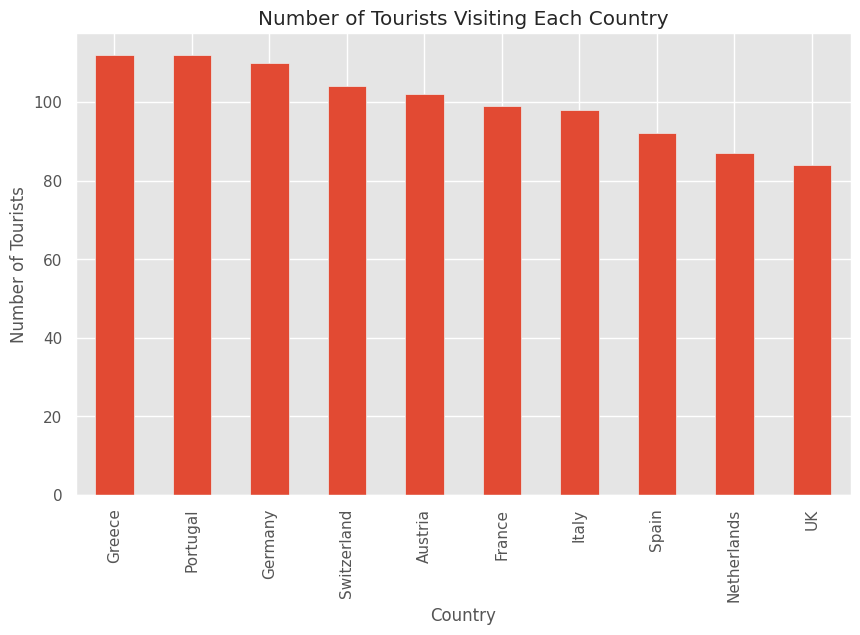

In [6]:
# Count the number of tourists visiting each country using value_counts
country_counts = tourist_data['Country_Visited'].value_counts()

# Plot the number of tourists visiting each country
country_counts.plot(kind='bar', figsize=(10, 6), title='Number of Tourists Visiting Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Tourists')
plt.show()

Travel Preferences by Country (Numerical Results):

In [7]:
print(country_counts)

Country_Visited
Greece         112
Portugal       112
Germany        110
Switzerland    104
Austria        102
France          99
Italy           98
Spain           92
Netherlands     87
UK              84
Name: count, dtype: int64


Exploratory Data Analysis (EDA):
* Distribution of Travel Modes

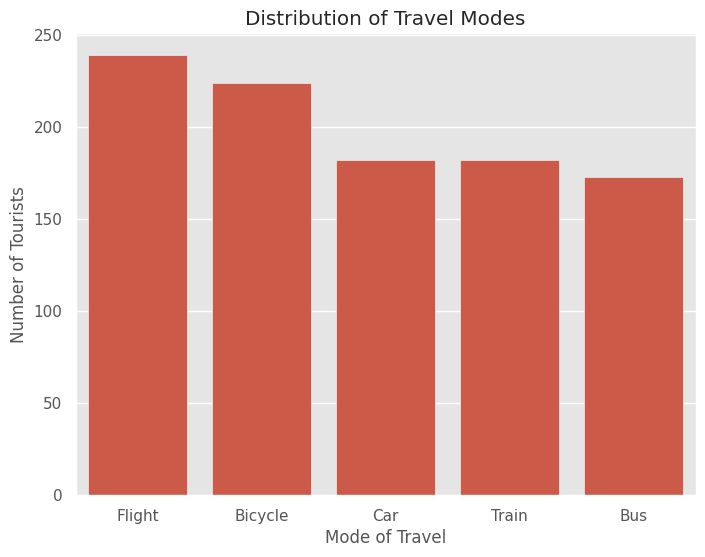

Percentage of Tourists using each mode of transport:
 Mode_of_Travel
Flight     23.9
Bicycle    22.4
Car        18.2
Train      18.2
Bus        17.3
Name: count, dtype: float64


In [8]:
# Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Mode_of_Travel', data=tourist_data, order=tourist_data['Mode_of_Travel'].value_counts().index) #added order to show most frequent
plt.title('Distribution of Travel Modes')
plt.xlabel('Mode of Travel')
plt.ylabel('Number of Tourists')
plt.show()

# Numerical Analysis (Percentage of each mode)
mode_counts = tourist_data['Mode_of_Travel'].value_counts()
mode_percentages = mode_counts / len(tourist_data) * 100
print("Percentage of Tourists using each mode of transport:\n", mode_percentages)

* Travel Duration Distribution

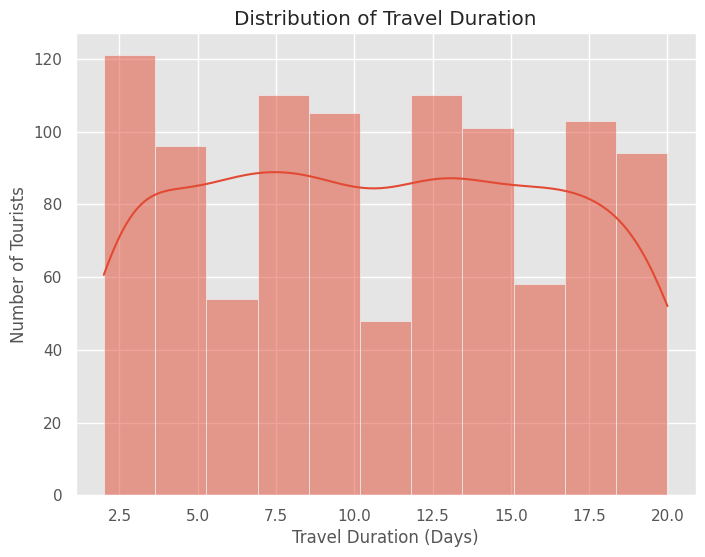


Descriptive Statistics for Travel Duration:
 count    1000.000000
mean       10.820000
std         5.489785
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: Travel_Duration_Days, dtype: float64


In [9]:
# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(tourist_data['Travel_Duration_Days'], kde=True)
plt.title('Distribution of Travel Duration')
plt.xlabel('Travel Duration (Days)')
plt.ylabel('Number of Tourists')
plt.show()

# Numerical Analysis (Descriptive Statistics)
travel_duration_stats = tourist_data['Travel_Duration_Days'].describe()
print("\nDescriptive Statistics for Travel Duration:\n", travel_duration_stats)

* Travel Cost Distribution

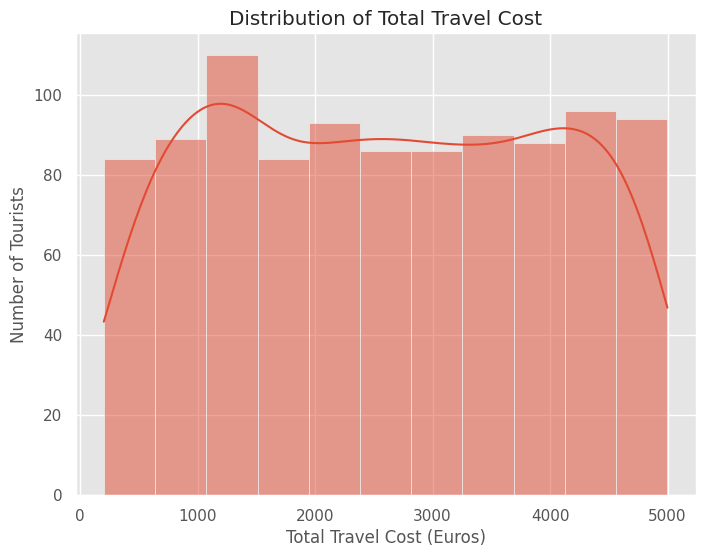


Descriptive Statistics for Total Travel Cost:
 count    1000.000000
mean     2600.376000
std      1393.394815
min       201.000000
25%      1352.250000
50%      2600.500000
75%      3849.500000
max      4999.000000
Name: Total_Travel_Cost, dtype: float64


In [10]:
# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(tourist_data['Total_Travel_Cost'], kde=True)
plt.title('Distribution of Total Travel Cost')
plt.xlabel('Total Travel Cost (Euros)')
plt.ylabel('Number of Tourists')
plt.show()

# Numerical Analysis (Descriptive Statistics)
travel_cost_stats = tourist_data['Total_Travel_Cost'].describe()
print("\nDescriptive Statistics for Total Travel Cost:\n", travel_cost_stats)

* Travelers by Country and City

<ipython-input-11-69e02f4b4b91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tourist_data, x='Country_Visited', palette='coolwarm', order=tourist_data['Country_Visited'].value_counts().index)


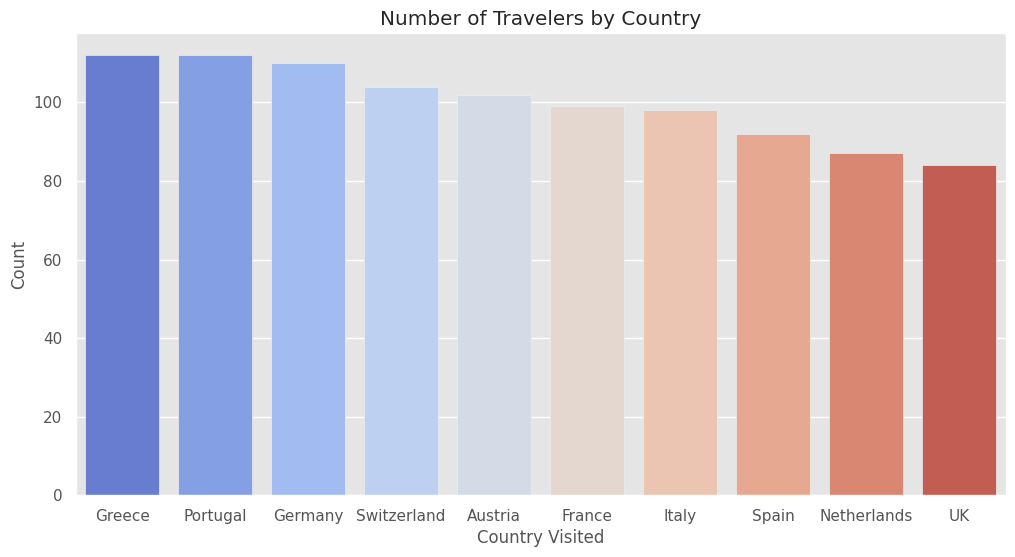

<ipython-input-11-69e02f4b4b91>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tourist_data, y='City_Visited', palette='magma', order=tourist_data['City_Visited'].value_counts().index)


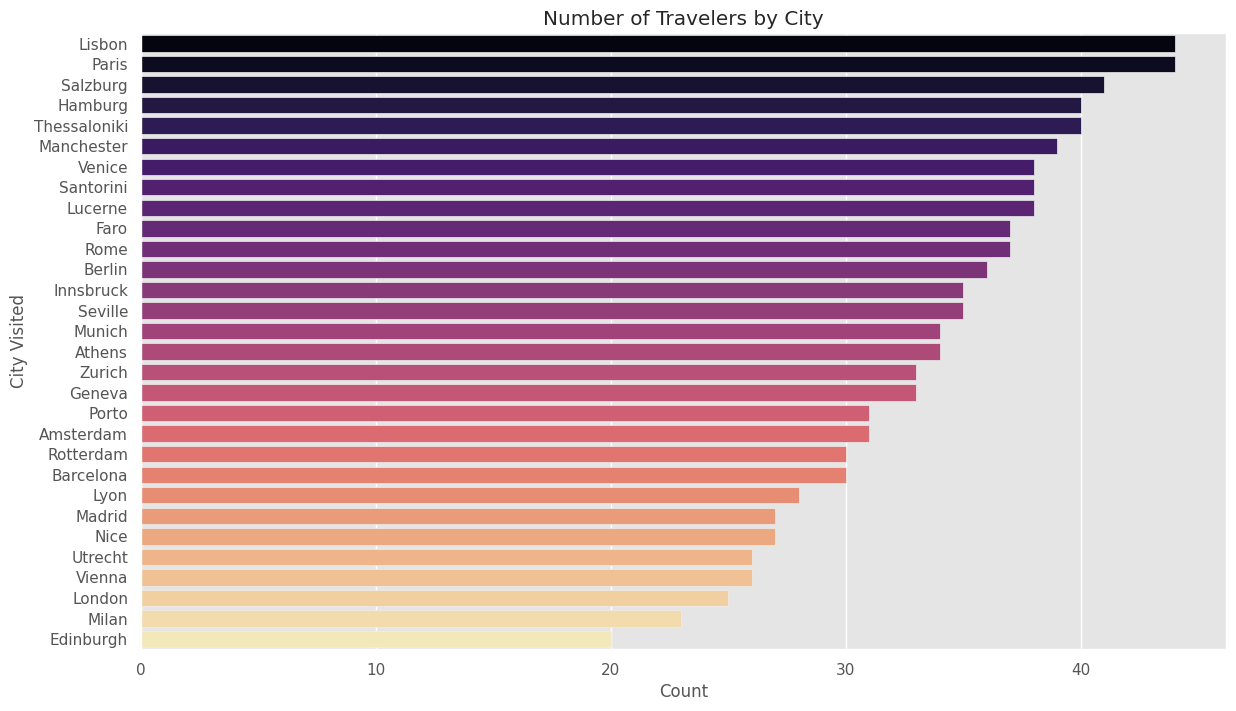

Country_Visited
Greece         112
Portugal       112
Germany        110
Switzerland    104
Austria        102
France          99
Italy           98
Spain           92
Netherlands     87
UK              84
Name: count, dtype: int64
City_Visited
Lisbon          44
Paris           44
Salzburg        41
Hamburg         40
Thessaloniki    40
Manchester      39
Venice          38
Santorini       38
Lucerne         38
Faro            37
Rome            37
Berlin          36
Innsbruck       35
Seville         35
Munich          34
Athens          34
Zurich          33
Geneva          33
Porto           31
Amsterdam       31
Rotterdam       30
Barcelona       30
Lyon            28
Madrid          27
Nice            27
Utrecht         26
Vienna          26
London          25
Milan           23
Edinburgh       20
Name: count, dtype: int64


In [11]:
# Plot number of travelers by country
plt.figure(figsize=(12, 6))
sns.countplot(data=tourist_data, x='Country_Visited', palette='coolwarm', order=tourist_data['Country_Visited'].value_counts().index)
plt.title('Number of Travelers by Country')
plt.xlabel('Country Visited')
plt.ylabel('Count')
plt.show()

# Plot number of travelers by city
plt.figure(figsize=(14, 8))
sns.countplot(data=tourist_data, y='City_Visited', palette='magma', order=tourist_data['City_Visited'].value_counts().index)
plt.title('Number of Travelers by City')
plt.xlabel('Count')
plt.ylabel('City Visited')
plt.show()

# Get count of travelers by country
country_counts = tourist_data['Country_Visited'].value_counts()
print(country_counts)

# Get count of travelers by city
city_counts = tourist_data['City_Visited'].value_counts()
print(city_counts)


* Travel Purpose vs. Mode of Travel

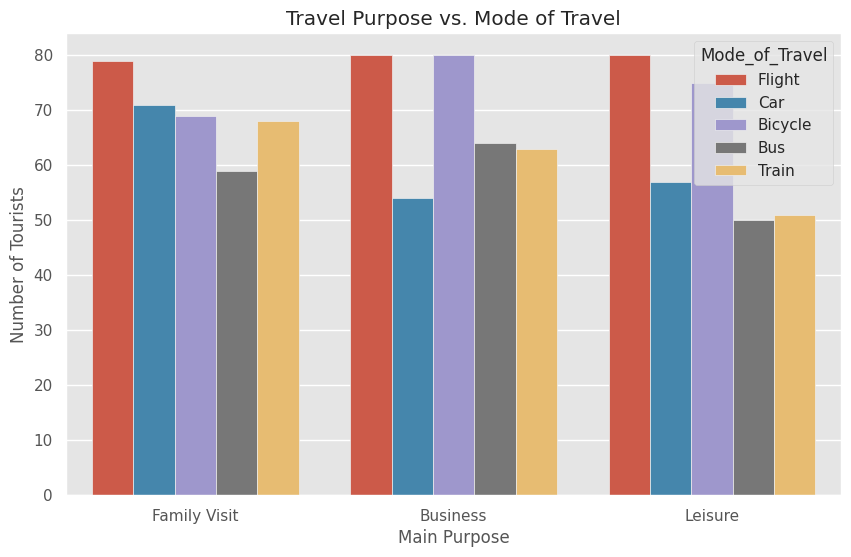


Crosstabulation of Travel Purpose and Mode of Travel:
 Mode_of_Travel  Bicycle  Bus  Car  Flight  Train
Main_Purpose                                    
Business             80   64   54      80     63
Family Visit         69   59   71      79     68
Leisure              75   50   57      80     51


In [12]:
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Main_Purpose', hue='Mode_of_Travel', data=tourist_data)
plt.title('Travel Purpose vs. Mode of Travel')
plt.xlabel('Main Purpose')
plt.ylabel('Number of Tourists')
plt.show()

# Numerical Analysis (Crosstabulation)
purpose_mode_crosstab = pd.crosstab(tourist_data['Main_Purpose'], tourist_data['Mode_of_Travel'])
print("\nCrosstabulation of Travel Purpose and Mode of Travel:\n", purpose_mode_crosstab)

* Accommodation Type vs. Travel Cost

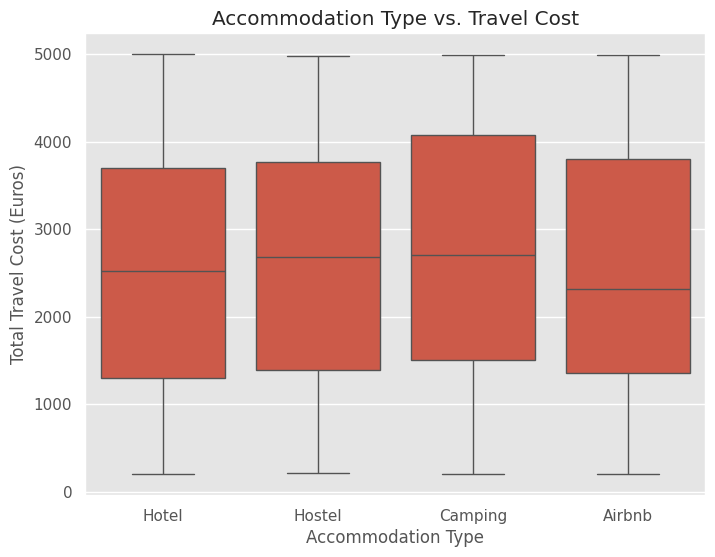


Median Travel Cost per Accommodation Type:
 Accommodation_Type
Airbnb     2319.5
Camping    2704.0
Hostel     2684.0
Hotel      2524.0
Name: Total_Travel_Cost, dtype: float64


In [13]:
# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Accommodation_Type', y='Total_Travel_Cost', data=tourist_data)
plt.title('Accommodation Type vs. Travel Cost')
plt.xlabel('Accommodation Type')
plt.ylabel('Total Travel Cost (Euros)')
plt.show()

# Numerical Analysis (Median Cost per Accommodation Type)
median_cost_per_accommodation = tourist_data.groupby('Accommodation_Type')['Total_Travel_Cost'].median()
print("\nMedian Travel Cost per Accommodation Type:\n", median_cost_per_accommodation)

* Season of Visit vs. Number of Tourists

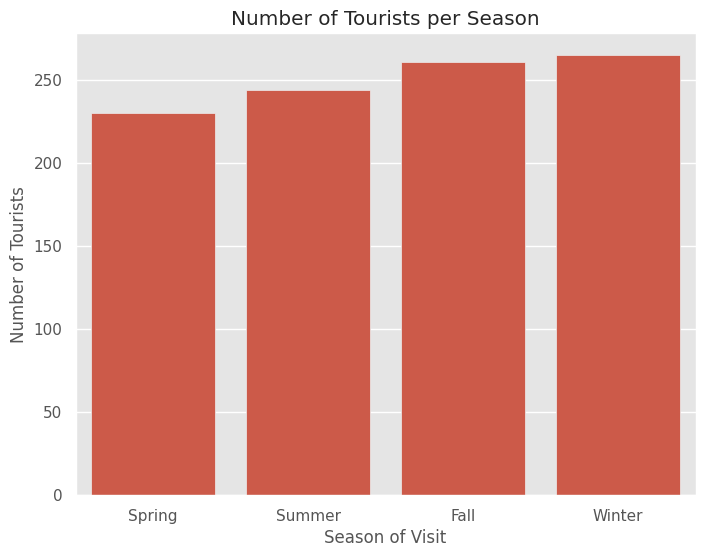


Number of Tourists per Season:
 Season_of_Visit
Winter    265
Fall      261
Summer    244
Spring    230
Name: count, dtype: int64


In [14]:
# Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Season_of_Visit', data=tourist_data, order=['Spring', 'Summer', 'Fall', 'Winter']) #added order to be more clear
plt.title('Number of Tourists per Season')
plt.xlabel('Season of Visit')
plt.ylabel('Number of Tourists')
plt.show()

# Numerical Analysis (Tourist Count per Season)
tourist_count_per_season = tourist_data['Season_of_Visit'].value_counts()
print("\nNumber of Tourists per Season:\n", tourist_count_per_season)

* Purpose of Travel Analysis

<ipython-input-15-850ff8885bfd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tourist_data, x='Main_Purpose', palette='muted')


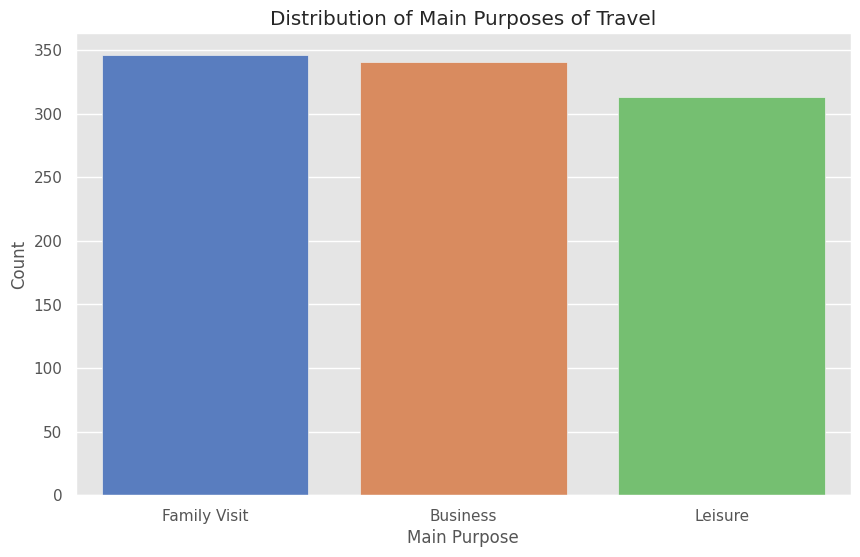

Main_Purpose
Family Visit    346
Business        341
Leisure         313
Name: count, dtype: int64


In [15]:
# Plot distribution of main purposes of travel
plt.figure(figsize=(10, 6))
sns.countplot(data=tourist_data, x='Main_Purpose', palette='muted')
plt.title('Distribution of Main Purposes of Travel')
plt.xlabel('Main Purpose')
plt.ylabel('Count')
plt.show()

# Get count of each main purpose of travel
purpose_counts = tourist_data['Main_Purpose'].value_counts()
print(purpose_counts)


* correlation between numerical variables to understand their relationships.

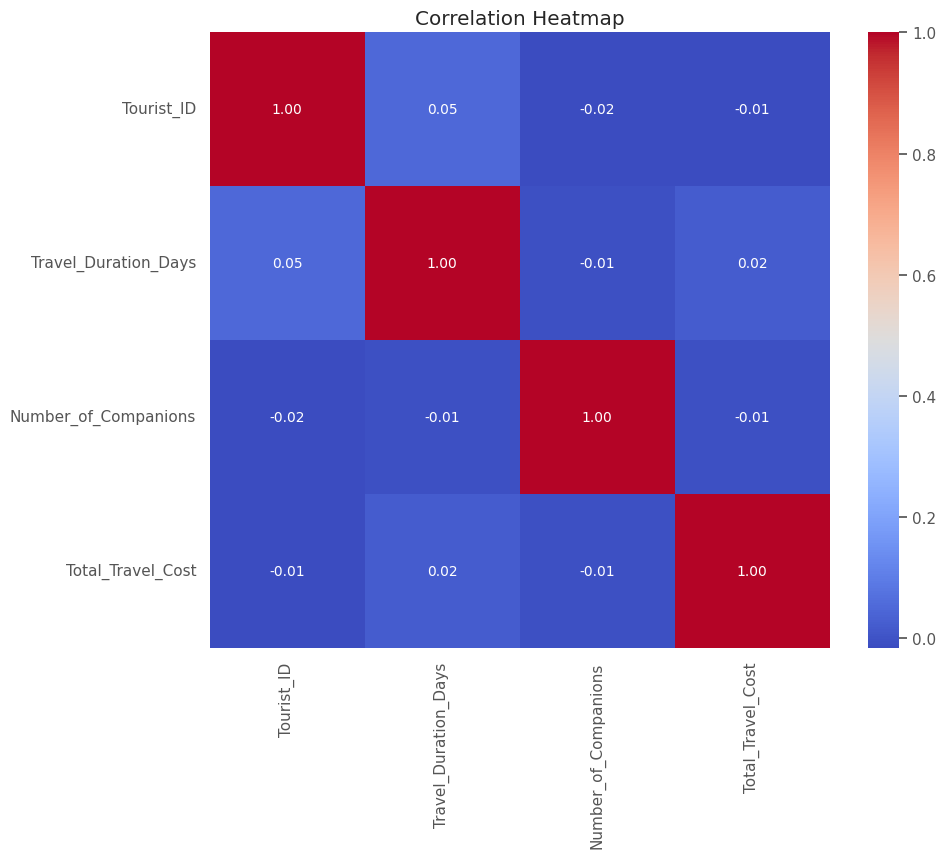

                      Tourist_ID  Travel_Duration_Days  Number_of_Companions  \
Tourist_ID              1.000000              0.047932             -0.016499   
Travel_Duration_Days    0.047932              1.000000             -0.006390   
Number_of_Companions   -0.016499             -0.006390              1.000000   
Total_Travel_Cost      -0.014366              0.022975             -0.008171   

                      Total_Travel_Cost  
Tourist_ID                    -0.014366  
Travel_Duration_Days           0.022975  
Number_of_Companions          -0.008171  
Total_Travel_Cost              1.000000  


In [16]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation calculation
corr = tourist_data.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Calculate the correlation matrix for numerical columns
correlation_matrix = tourist_data.select_dtypes(include=np.number).corr()
print(correlation_matrix)

* Top Tourist Destinations

<ipython-input-17-37c879716588>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


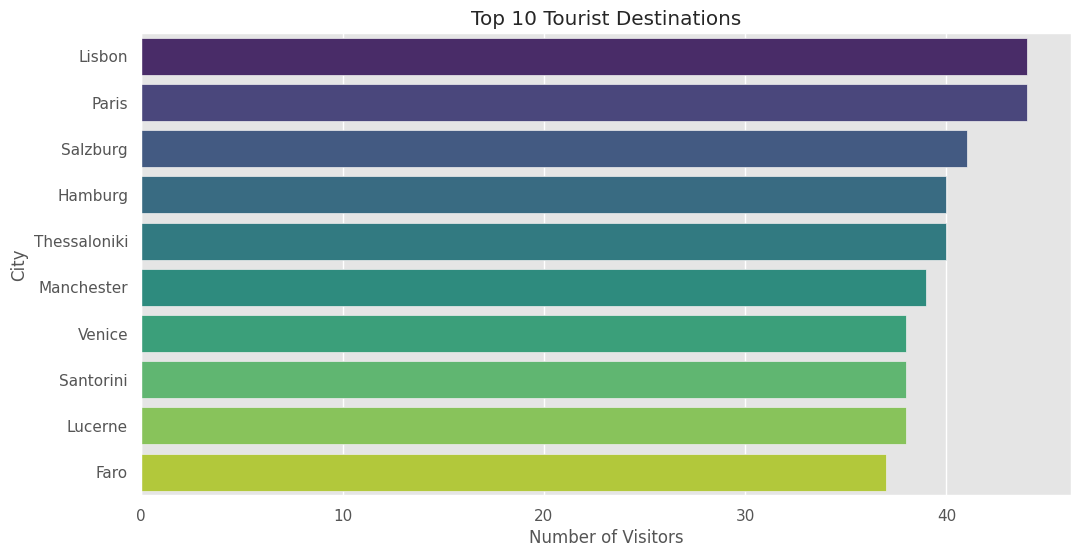

City_Visited
Lisbon          44
Paris           44
Salzburg        41
Hamburg         40
Thessaloniki    40
Manchester      39
Venice          38
Santorini       38
Lucerne         38
Faro            37
Name: count, dtype: int64


In [17]:
# Plot top tourist destinations
top_cities = tourist_data['City_Visited'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Tourist Destinations')
plt.xlabel('Number of Visitors')
plt.ylabel('City')
plt.show()

# Get the top 10 cities by number of visitors
top_cities = tourist_data['City_Visited'].value_counts().head(10)
print(top_cities)


* Travel Cost by Country

<ipython-input-18-523749c186e8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_country.values, y=avg_cost_country.index, palette='coolwarm')


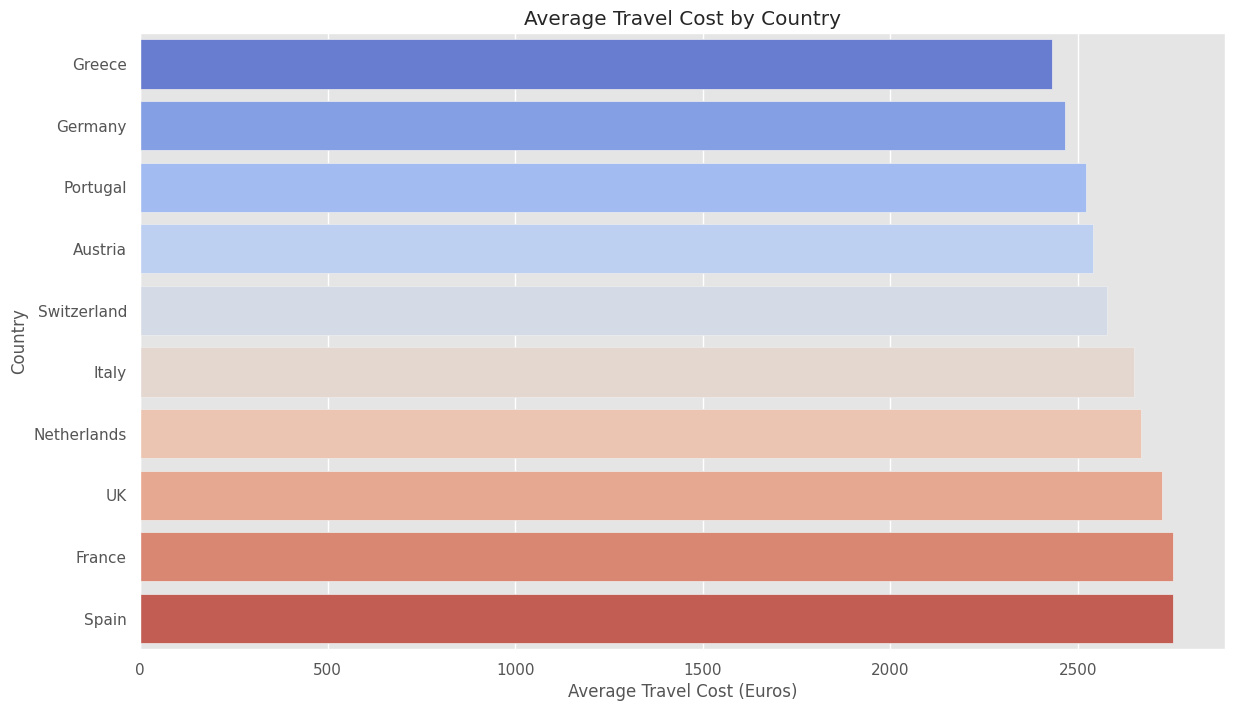

Country_Visited
Austria        2540.519608
France         2754.040404
Germany        2466.545455
Greece         2430.848214
Italy          2650.836735
Netherlands    2667.919540
Portugal       2522.821429
Spain          2754.826087
Switzerland    2578.961538
UK             2725.178571
Name: Total_Travel_Cost, dtype: float64


In [18]:
# Plot average travel cost by country
plt.figure(figsize=(14, 8))
avg_cost_country = tourist_data.groupby('Country_Visited')['Total_Travel_Cost'].mean().sort_values()
sns.barplot(x=avg_cost_country.values, y=avg_cost_country.index, palette='coolwarm')
plt.title('Average Travel Cost by Country')
plt.xlabel('Average Travel Cost (Euros)')
plt.ylabel('Country')
plt.show()

# Calculate average travel cost by country
avg_cost_country = tourist_data.groupby('Country_Visited')['Total_Travel_Cost'].mean()
print(avg_cost_country)


* Accommodation Type by Season

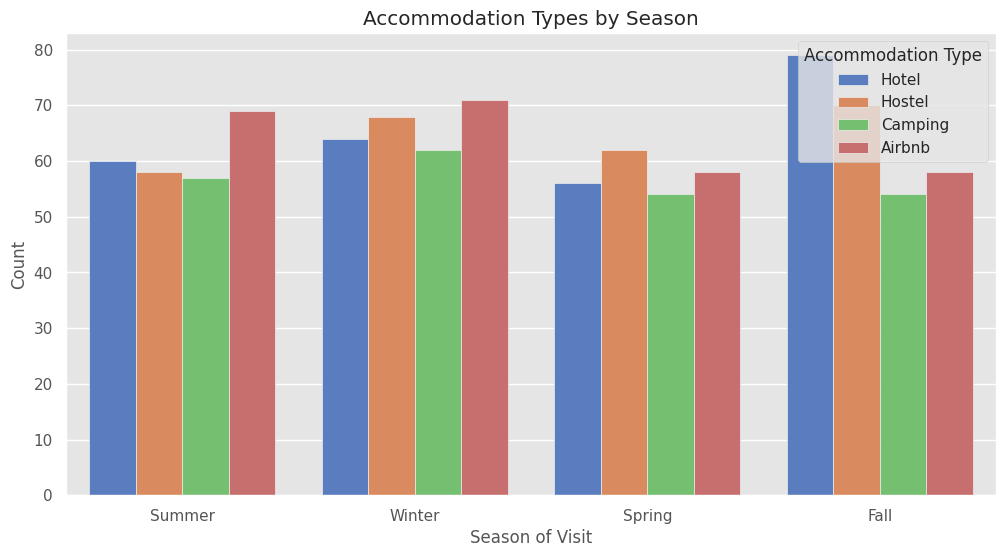

Accommodation_Type  Airbnb  Camping  Hostel  Hotel
Season_of_Visit                                   
Fall                    58       54      70     79
Spring                  58       54      62     56
Summer                  69       57      58     60
Winter                  71       62      68     64


In [19]:
# Plot accommodation types by season
plt.figure(figsize=(12, 6))
sns.countplot(data=tourist_data, x='Season_of_Visit', hue='Accommodation_Type', palette='muted')
plt.title('Accommodation Types by Season')
plt.xlabel('Season of Visit')
plt.ylabel('Count')
plt.legend(title='Accommodation Type')
plt.show()

# Get count of accommodation types by season
accommodation_by_season = pd.crosstab(tourist_data['Season_of_Visit'], tourist_data['Accommodation_Type'])
print(accommodation_by_season)


* Companions by Travel Mode

<ipython-input-20-40304c1a4cd3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_companions_mode.values, y=avg_companions_mode.index, palette='Spectral')


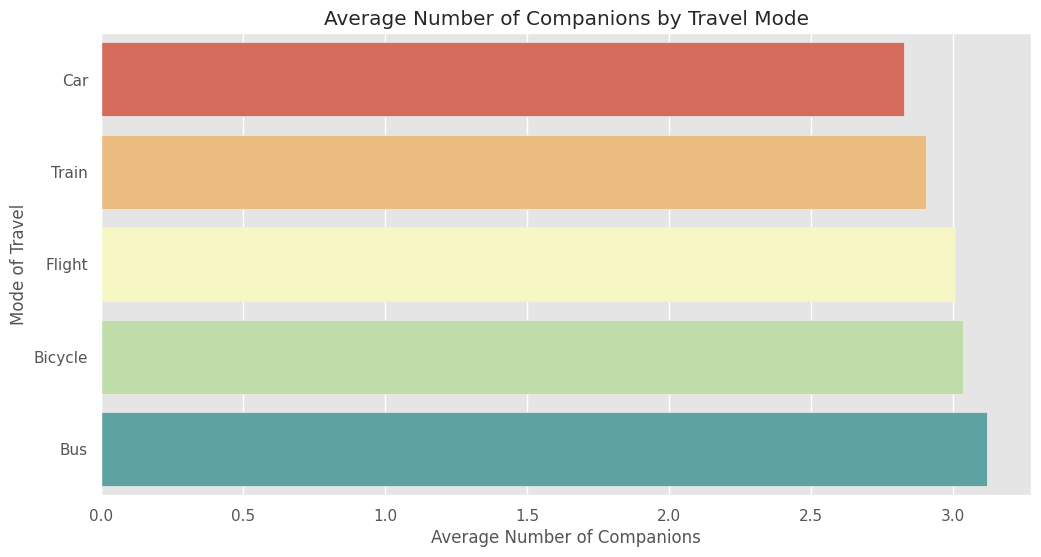

Mode_of_Travel
Bicycle    3.035714
Bus        3.121387
Car        2.829670
Flight     3.008368
Train      2.906593
Name: Number_of_Companions, dtype: float64


In [20]:
# Plot average number of companions by travel mode
plt.figure(figsize=(12, 6))
avg_companions_mode = tourist_data.groupby('Mode_of_Travel')['Number_of_Companions'].mean().sort_values()
sns.barplot(x=avg_companions_mode.values, y=avg_companions_mode.index, palette='Spectral')
plt.title('Average Number of Companions by Travel Mode')
plt.xlabel('Average Number of Companions')
plt.ylabel('Mode of Travel')
plt.show()


# Calculate average number of companions by travel mode
avg_companions_mode = tourist_data.groupby('Mode_of_Travel')['Number_of_Companions'].mean()
print(avg_companions_mode)


In [22]:
# Distribution of Travel Modes
fig1 = px.pie(tourist_data, names='Mode_of_Travel', title='Distribution of Travel Modes')

# Travel Duration Distribution
fig2 = px.histogram(tourist_data, x='Travel_Duration_Days', nbins=20, title='Distribution of Travel Duration')

# Average Travel Cost by Country
avg_cost_country = tourist_data.groupby('Country_Visited')['Total_Travel_Cost'].mean().sort_values()
fig3 = px.bar(x=avg_cost_country.index, y=avg_cost_country.values, labels={'x': 'Country', 'y': 'Average Travel Cost'}, title='Average Travel Cost by Country')

# Top Tourist Destinations
top_cities = tourist_data['City_Visited'].value_counts().head(10)
fig4 = px.bar(x=top_cities.index, y=top_cities.values, labels={'x': 'City', 'y': 'Number of Visitors'}, title='Top 10 Tourist Destinations')

# Main Purpose of Travel
fig5 = px.pie(tourist_data, names='Main_Purpose', title='Main Purpose of Travel')

# Create a dashboard layout
fig = go.Figure()
fig.add_trace(fig1.data[0])
fig.add_trace(fig2.data[0])
fig.add_trace(fig3.data[0])
fig.add_trace(fig4.data[0])
fig.add_trace(fig5.data[0])

# Update layout for the dashboard
fig.update_layout(title_text='Tourist Travel Modes in Europe Dashboard',
                  grid=dict(rows=3, columns=2, pattern='independent'),
                  template='plotly_dark')

# Display the dashboard
fig.show()


In [25]:
from plotly.subplots import make_subplots
# --- Color palettes ---
metallic_palette = ['#B8860B', '#A0522D', '#D2691E', '#CD7F32', '#BC8F8F']
complementary_palette = ['#ADD8E6', '#87CEFA', '#B0E0E6', '#E0FFFF', '#AFEEEE']

# --- Plot Functions ---
def create_pie_chart(data, title):
    fig = px.pie(data, values=data.values, names=data.index, title=title, color_discrete_sequence=metallic_palette)
    fig.update_traces(hoverinfo='percent+label', textinfo='percent', marker=dict(line=dict(color='white', width=2)))
    return fig

def create_histogram(df, x_col, title):
    fig = px.histogram(df, x=x_col, title=title, nbins=20, color_discrete_sequence=[metallic_palette[0]])
    fig.update_traces(marker=dict(line=dict(color='white', width=1)))
    return fig

def create_heatmap(crosstab, title):
    fig = px.imshow(crosstab, labels=dict(x="Mode of Travel", y="Travel Purpose", color="Number of Tourists"),
                    title=title, color_continuous_scale="Viridis")
    return fig

def create_boxplot(df, x_col, y_col, title):
    fig = px.box(df, x=x_col, y=y_col, title=title, color_discrete_sequence=metallic_palette)
    fig.update_traces(boxmean=True, marker=dict(size=6, color='white', line=dict(color='black', width=1)))
    return fig

def create_bar_chart(data, title, color_palette=metallic_palette):
    fig = px.bar(data, x=data.index, y=data.values, title=title, color_discrete_sequence=color_palette)
    fig.update_traces(marker=dict(line=dict(color='white', width=1)))
    return fig

# --- Data Processing for Plots ---
mode_counts = tourist_data['Mode_of_Travel'].value_counts()
purpose_mode_crosstab = pd.crosstab(tourist_data['Main_Purpose'], tourist_data['Mode_of_Travel'])
season_counts = tourist_data['Season_of_Visit'].value_counts()
cost_by_country = tourist_data.groupby('Country_Visited')['Total_Travel_Cost'].mean().sort_values(ascending=False)
top_destinations = tourist_data['City_Visited'].value_counts().nlargest(10)

# --- Create Plots ---
fig_mode = create_pie_chart(mode_counts, 'Distribution of Travel Modes')
fig_duration = create_histogram(tourist_data, 'Travel_Duration_Days', 'Distribution of Travel Duration')
fig_cost = create_histogram(tourist_data, 'Total_Travel_Cost', 'Distribution of Total Travel Cost')
fig_purpose_mode = create_heatmap(purpose_mode_crosstab, 'Travel Purpose vs. Mode of Travel')
fig_accommodation_cost = create_boxplot(tourist_data, 'Accommodation_Type', 'Total_Travel_Cost', 'Accommodation Type vs. Travel Cost')
fig_season = create_bar_chart(season_counts, 'Number of Tourists per Season', complementary_palette)
fig_country_cost = create_bar_chart(cost_by_country, 'Average Travel Cost by Country')
fig_top_destinations = create_bar_chart(top_destinations, 'Top 10 Tourist Destinations')

# --- Subplots with Corrected Layout ---
fig_all = make_subplots(rows=4, cols=2, subplot_titles=(
    'Distribution of Travel Modes', 'Distribution of Travel Duration',
    'Distribution of Total Travel Cost', 'Travel Purpose vs. Mode of Travel',
    'Accommodation Type vs. Travel Cost', 'Number of Tourists per Season',
    'Average Travel Cost by Country', 'Top 10 Tourist Destinations'
), specs=[[{'type': 'pie'}, {'type': 'xy'}], [{'type': 'xy'}, {'type': 'xy'}],
        [{'type': 'xy'}, {'type': 'xy'}], [{'type': 'xy'}, {'type': 'xy'}]])

plots = [fig_mode, fig_duration, fig_cost, fig_purpose_mode, fig_accommodation_cost, fig_season, fig_country_cost, fig_top_destinations]
row_col = [(1,1), (1,2), (2,1), (2,2), (3,1), (3,2), (4,1), (4,2)]

for i, plot in enumerate(plots):
    for trace in plot.data:
        fig_all.add_trace(trace, row=row_col[i][0], col=row_col[i][1])


# --- Layout Updates for Readability ---
fig_all.update_layout(
    title='Tourist Travel in Europe - Interactive Dashboard',
    height=1400, width=1200,
    plot_bgcolor='#222',
    paper_bgcolor='#333',
    font=dict(color='white'),
    margin=dict(l=50, r=50, b=100, t=100),
    template="plotly_dark"
)

fig_all.update_xaxes(tickangle=-45)
fig_all.update_yaxes(title_standoff=10)

fig_all.show()

In [26]:
# --- Report Generation ---
report_html = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Tourist Travel in Europe - Data Analysis Report</title>
    <style>
        body {{
            font-family: sans-serif;
            line-height: 1.6;
            color: #333; /* Dark gray text for contrast */
            margin: 20px;
            background-color: #f8f8f8; /* Light gray background */
        }}
        h1, h2, h3 {{
            color: #2c3e50; /* Dark blue headings */
        }}
        .section {{
            margin-bottom: 20px;
            padding: 20px;
            background-color: white;
            border-radius: 8px;
            box-shadow: 0 2px 5px rgba(0,0,0,0.1); /* Subtle shadow */
        }}
        .highlight {{
            color: #e74c3c; /* Red highlight color */
            font-weight: bold;
        }}
        .container {{
            max-width: 900px;
            margin: 0 auto;
        }}
        .signature {{
            margin-top: 30px;
            text-align: right;
            font-style: italic;
        }}
        .plotly-graph-div {{ /* Target Plotly divs */
            width: 100%; /* Make charts responsive */
            margin: 20px 0; /* Add margin around charts */
        }}
    </style>
</head>
<body>
<div class="container">
    <h1>Tourist Travel in Europe - Data Analysis Report</h1>

    <div class="section">
        <h2>1. Ask</h2>
        <p>
            The primary objective of this project was to analyze tourist travel patterns in Europe.
            We aimed to understand:
            <ul>
                <li>What are the most popular modes of transport?</li>
                <li>How long do tourists typically stay?</li>
                <li>What are the average travel costs?</li>
                <li>Which countries and cities are most frequently visited?</li>
                <li>How does the purpose of travel influence transport choices?</li>
                <li>Is there a relationship between accommodation type and travel cost?</li>
                <li>Are there seasonal trends in tourism?</li>
            </ul>
            This information is valuable for stakeholders in the tourism industry, allowing them to make informed decisions
            regarding marketing, resource allocation, and service development.
        </p>
    </div>

    <div class="section">
        <h2>2. Prepare</h2>
        <p>
            The dataset used in this analysis, "Tourist_Travel_Europe.csv," contained information about tourist trips,
            including travel duration, cost, mode of transport, accommodation type, purpose of travel, and destination.
            The data was loaded using the pandas library in Python.
        </p>
    </div>

    <div class="section">
        <h2>3. Process</h2>
        <p>
            The data was initially inspected for missing values using <code>isnull().sum()</code>. Fortunately, no missing values were found.
            Exploratory Data Analysis (EDA) was performed to understand the data's characteristics.
            This included calculating descriptive statistics for numerical variables and examining unique values
            for categorical variables. The data was then processed and aggregated for visualization.
        </p>
    </div>

    <div class="section">
        <h2>4. Analyze</h2>
        <p>
            The analysis involved creating visualizations using Plotly to identify trends and patterns. Key findings include:
            <ul>
                <li><span class="highlight">Flight</span> is the most popular mode of transport, followed by <span class="highlight">Bicycle</span>.</li>
                <li>Average travel duration is approximately <span class="highlight">10.8 days</span>.</li>
                <li>Average total travel cost is around <span class="highlight">2600 euros</span>.</li>
                <li><span class="highlight">Lisbon</span> and <span class="highlight">Paris</span> are the most visited cities.</li>
                <li><span class="highlight">Spain</span> and <span class="highlight">France</span> have the highest average travel costs.</li>
                <li>There are some variations in accommodation preferences across seasons.</li>
            </ul>
        </p>
        {fig_all.to_html(full_html=False, include_plotlyjs='cdn')}  </div>

    <div class="section">
        <h2>5. Share</h2>
        <p>
            The interactive dashboard generated by Plotly allows stakeholders to explore the data dynamically.
            This report summarizes the key findings and provides actionable recommendations.
        </p>
    </div>

    <div class="section">
        <h2>6. Act</h2>
        <p>
            Based on the analysis, the following recommendations are made:
            <ul>
                <li>Tourism agencies should focus on promoting flight and bicycle travel options.</li>
                <li>Targeted marketing campaigns can be developed for popular destinations like Lisbon and Paris.</li>
                <li>Accommodation providers can adjust pricing strategies based on seasonal demand and cost variations by country.</li>
                <li>Further research could explore the factors driving travel costs and the motivations behind different travel purposes.</li>
            </ul>
        </p>
    </div>

    <div class="section">
        <h2>Thank You</h2>
        <p>
            Thank you for taking the time to read this report.  I hope the insights presented here are valuable.
        </p>
    </div>

    <div class="signature">
        Walid Barghout
    </div>
</div>
</body>
</html>
"""

with open("tourist_travel_report.html", "w") as f:
    f.write(report_html)

print("Report generated successfully as tourist_travel_report.html")

Report generated successfully as tourist_travel_report.html
